In [50]:
# Import Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pathlib import Path

In [51]:
# Read in csv

crime_data_csv = Path("../../chicago_crimes_all_cleaned.csv")

crime_df = pd.read_csv(crime_data_csv)

crime_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11556487,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,1320,MINOR PROPERTY CRIME,TO VEHICLE,STREET,False,False,...,19.0,74.0,14,1158309.0,1829936.0,2018,01/10/2019 03:16:50 PM,41.689079,-87.696064,"(41.689078832, -87.696064026)"
1,11552699,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,1310,MINOR PROPERTY CRIME,TO PROPERTY,APARTMENT,False,False,...,21.0,71.0,14,1171454.0,1848783.0,2018,01/10/2019 03:16:50 PM,41.740521,-87.647391,"(41.740520866, -87.647390719)"
2,11552724,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,0440,ASSAULT & BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,OTHER,True,False,...,25.0,31.0,08B,1168327.0,1891230.0,2018,01/10/2019 03:16:50 PM,41.857068,-87.657625,"(41.857068095, -87.657625201)"
3,11552731,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,0486,ASSAULT & BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,False,...,17.0,71.0,08B,1171332.0,1852934.0,2018,01/10/2019 03:16:50 PM,41.751914,-87.647717,"(41.75191443, -87.647716532)"
4,11552715,JC100026,12/31/2018 11:49:00 PM,052XX W GLADYS AVE,041A,ASSAULT & BATTERY,AGGRAVATED - HANDGUN,STREET,False,False,...,29.0,25.0,04B,1140262.0,1897810.0,2018,03/28/2020 03:47:02 PM,41.875684,-87.760479,"(41.87568438, -87.760479356)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163207,12847575,JF420478,9/1/2022 5:00,005XX W SURF ST,2825,OTHER MINOR CRIMES,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,44.0,6.0,26,1172497.0,1919410.0,2022,1/3/2023 15:46,41.934305,-87.641485,"(41.934304581, -87.641484982)"
1163208,12847801,JF420319,7/8/2022 0:00,114XX S PRAIRIE AVE,1130,THEFT (ALL TYPES),FRAUD OR CONFIDENCE GAME,STREET,False,False,...,9.0,49.0,11,1179966.0,1828818.0,2022,1/3/2023 15:46,41.685544,-87.616813,"(41.685543881, -87.616812541)"
1163209,12847324,JF420102,9/27/2022 11:00,023XX E 70TH ST,810,THEFT (ALL TYPES),OVER $500,RESIDENCE,False,False,...,5.0,43.0,6,1193181.0,1859005.0,2022,1/3/2023 15:46,41.768068,-87.567453,"(41.768068052, -87.567452932)"
1163210,12847570,JF420427,9/3/2022 10:25,052XX W CARMEN AVE,2021,DRUG RELATED,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,...,45.0,11.0,18,1140553.0,1933418.0,2022,1/3/2023 15:46,41.973391,-87.758535,"(41.973391184, -87.758534512)"


In [52]:
crime_df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [66]:
crime_df["Year"].value_counts().sort_index

<bound method Series.sort_index of 2018    262837
2019    258163
2022    232532
2020    207437
2021    202243
Name: Year, dtype: int64>

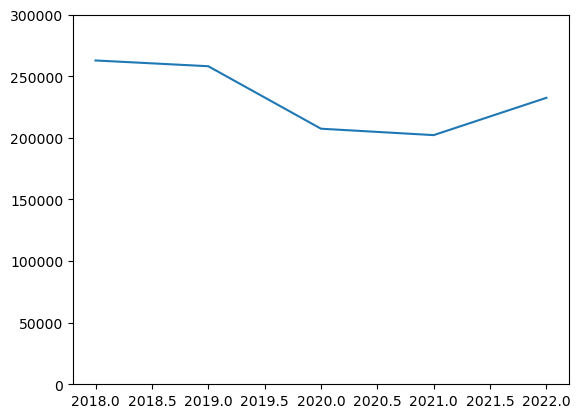

In [69]:
x_axis = crime_df["Year"].unique()
y_axis = crime_df["Year"].value_counts().sort_index()
plt.plot(x_axis, y_axis)
plt.ylim(0, 300000)

plt.savefig("Images/total.png")

In [55]:
crime_df["Primary Type"].value_counts()

THEFT (ALL TYPES)                   484967
ASSAULT & BATTERY                   323858
MINOR PROPERTY CRIME                156167
OTHER MINOR CRIMES                   87404
DRUG RELATED                         43137
WEAPONS RELATED CRIME                38697
SEXUAL RELATED CRIME                 12597
OFFENSE INVOLVING CHILDREN            9948
HOMICIDE                              3439
ARSON                                 2278
KIDNAPPING AND HUMAN TRAFFICKING       717
NON-CRIMINAL (SUBJECT SPECIFIED)         3
Name: Primary Type, dtype: int64

In [56]:
grouped_df = crime_df.groupby(["Primary Type", "Year"])[["Case Number"]].count().sort_values(by = ["Primary Type", "Year"], ascending = True)

grouped_df


Case Number
Primary Type                     Year             
ARSON                            2018          373
                                 2019          374
                                 2020          586
                                 2021          527
                                 2022          418
ASSAULT & BATTERY                2018        70420
                                 2019        70459
                                 2020        59971
                                 2021        61039
                                 2022        61969
DRUG RELATED                     2018        12797
                                 2019        15002
                                 2020         7275
                                 2021         4091
                                 2022         3972
HOMICIDE                         2018          601
                                 2019          508
                                 2020          796
                                 2021          810
                                 2022          724
KIDNAPPING AND HUMAN TRAFFICKING 2018          183
                                 2019          185
                                 2020          123
                                 2021           96
                                 2022          130
MINOR PROPERTY CRIME             2018        34580
                                 2019        33416
                                 2020        28846
                                 2021        28223
                                 2022        31102
NON-CRIMINAL (SUBJECT SPECIFIED) 2018            3
OFFENSE INVOLVING CHILDREN       2018         2186
                                 2019         2342
                                 2020         1857
                                 2021         1761
                                 2022         1802
OTHER MINOR CRIMES               2018        20935
                                 2019        20913
                                 2020        14812
                                 2021        14882
                                 2022        15862
SEXUAL RELATED CRIME             2018         2621
                                 2019         2892
                                 2020         2033
                                 2021         2423
                                 2022         2628
THEFT (ALL TYPES)                2018       112546
                                 2019       105518
                                 2020        82573
                                 2021        79277
                                 2022       105053
WEAPONS RELATED CRIME            2018         5592
                                 2019         6554
                                 2020         8565
                                 2021         9114
                                 2022         8872

In [57]:
years = crime_df["Year"].unique()
weapons_counts = grouped_df.iloc[51:56, 0]

weapons_counts

Primary Type           Year
WEAPONS RELATED CRIME  2018    5592
                       2019    6554
                       2020    8565
                       2021    9114
                       2022    8872
Name: Case Number, dtype: int64

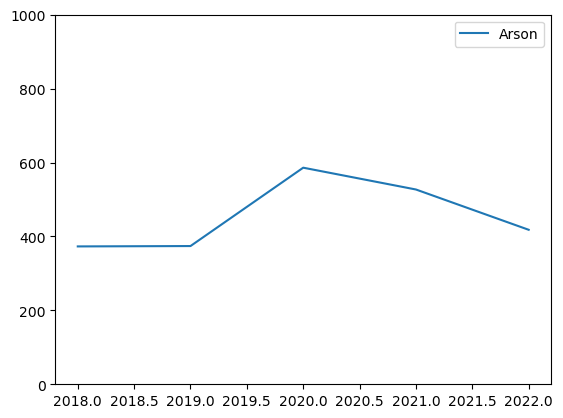

In [58]:
plt.plot(years, arson_counts, label="Arson")
plt.ylim(0, 1000)
plt.legend(loc="best")
plt.show()

In [59]:
years = crime_df["Year"].unique()
theft_counts = grouped_df.iloc[46:51, 0]
assault_counts = grouped_df.iloc[5:10, 0]
property_counts = property_counts = grouped_df.iloc[25:30, 0]
minor_counts = grouped_df.iloc[36:41, 0]
drug_counts = grouped_df.iloc[10:15, 0]
weapons_counts = grouped_df.iloc[51:56, 0]
sexual_counts = grouped_df.iloc[41:46, 0]
children_counts = children_counts = grouped_df.iloc[31:36, 0]
homicide_counts = grouped_df.iloc[15:20, 0]
arson_counts = grouped_df.iloc[0:5, 0]
kidnapping_counts = grouped_df.iloc[20:25, 0]

years


array([2018, 2019, 2020, 2021, 2022], dtype=int64)

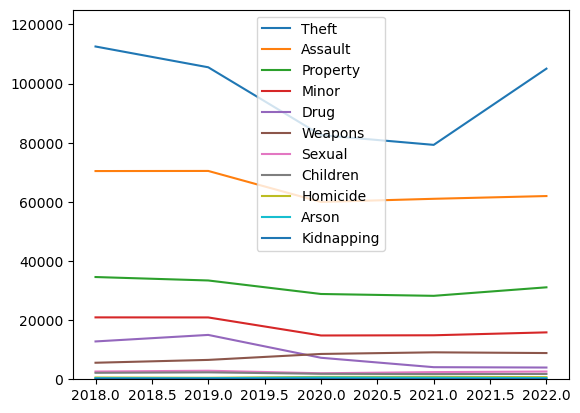

<Figure size 640x480 with 0 Axes>

In [60]:
plt.plot(years, theft_counts, label="Theft")
plt.plot(years, assault_counts, label="Assault")
plt.plot(years, property_counts, label="Property")
plt.plot(years, minor_counts, label="Minor")
plt.plot(years, drug_counts, label="Drug")
plt.plot(years, weapons_counts, label="Weapons")
plt.plot(years, sexual_counts, label="Sexual")
plt.plot(years, children_counts, label="Children")
plt.plot(years, homicide_counts, label="Homicide")
plt.plot(years, arson_counts, label="Arson")
plt.plot(years, kidnapping_counts, label="Kidnapping")
plt.ylim(0, 125000)
plt.legend(loc="best")
plt.show()
plt.savefig("Images/all_types.png")


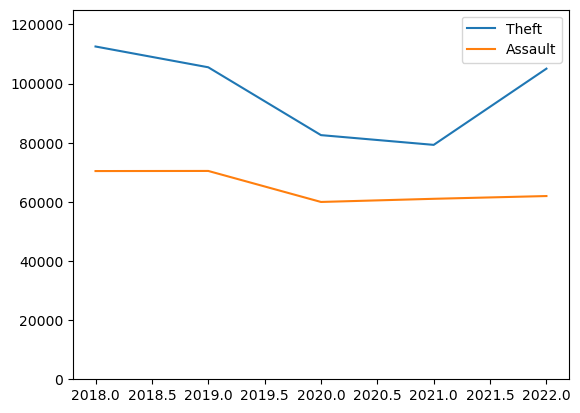

<Figure size 640x480 with 0 Axes>

In [61]:
plt.plot(years, theft_counts, label="Theft")
plt.plot(years, assault_counts, label="Assault")
plt.ylim(0, 125000)
plt.legend(loc="best")
plt.show()
plt.savefig("Images/highest_volume.png")

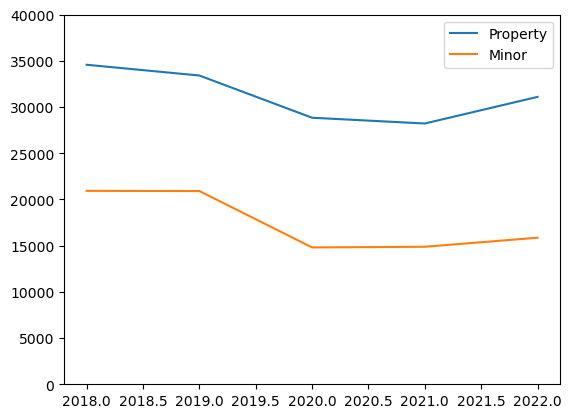

<Figure size 640x480 with 0 Axes>

In [62]:
plt.plot(years, property_counts, label="Property")
plt.plot(years, minor_counts, label="Minor")
plt.ylim(0, 40000)
plt.legend(loc="best")
plt.show()
plt.savefig("Images/high_volume.png")

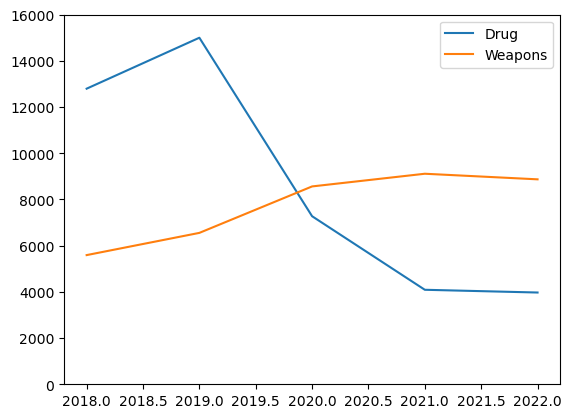

<Figure size 640x480 with 0 Axes>

In [63]:
plt.plot(years, drug_counts, label="Drug")
plt.plot(years, weapons_counts, label="Weapons")
plt.ylim(0, 16000)
plt.legend(loc="best")
plt.show()
plt.savefig("Images/medium_volume.png")

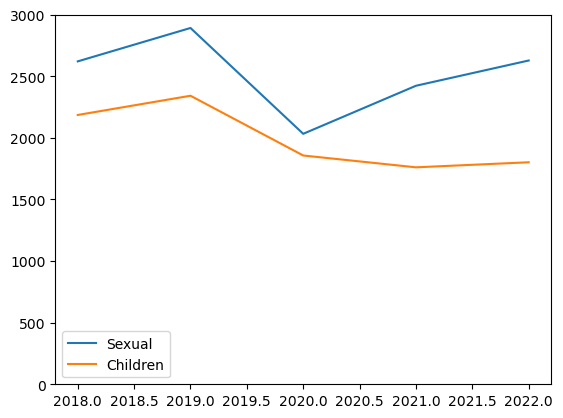

<Figure size 640x480 with 0 Axes>

In [64]:
plt.plot(years, sexual_counts, label="Sexual")
plt.plot(years, children_counts, label="Children")
plt.ylim(0, 3000)
plt.legend(loc="best")
plt.show()
plt.savefig("Images/low_volume.png")

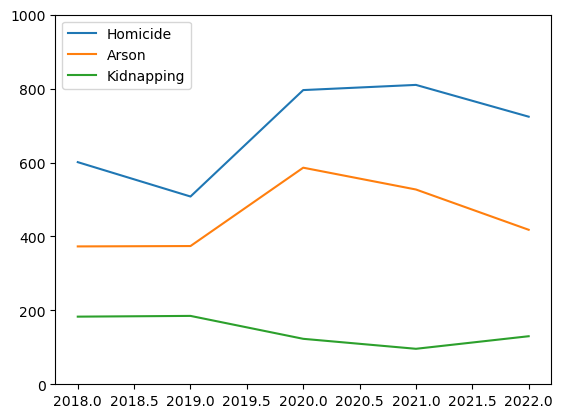

<Figure size 640x480 with 0 Axes>

In [65]:
plt.plot(years, homicide_counts, label="Homicide")
plt.plot(years, arson_counts, label="Arson")
plt.plot(years, kidnapping_counts, label="Kidnapping")
plt.ylim(0, 1000)
plt.legend(loc="best")
plt.show()
plt.savefig("Images/lowest_volume.png")